### Step 5: Model Deployment

In [1]:
suppressMessages(library('dplyr'))
suppressMessages(library('quantmod'))
suppressMessages(library('repr'))
suppressMessages(library('xlsx'))
suppressMessages(library('derivmkts'))
suppressMessages(library('ggplot2'))
options(repr.plot.width = 5.5, repr.plot.height =4)

#### Read in Data



In [2]:
TSLA_OPTIONS = xlsx::read.xlsx('Data/TSLA_OPTIONS.xlsx', sheetName = "Sheet1")

TSLA_STOCK = xlsx::read.xlsx('Data/TSLA_STOCK.xlsx', sheetName = "Sheet1")

In [9]:
n_row = dim(TSLA_OPTIONS)[1]
n_col = dim(TSLA_OPTIONS)[2]

print(paste(c("Total Number of Rows = ", n_row), collapse = ''))
print(paste(c("Total Number of Columns = ", n_col), collapse = ''))      

(TSLA_OPTIONS[1:5,])

[1] "Total Number of Rows = 1925"
[1] "Total Number of Columns = 16"


,Strike,Last,Chg,Bid,Ask,Vol,OI,LastTradeTime,IV,ITM,INDEX,Exp_date,TYPE,Snapshot_Date,Years_to_Exp_Date,Avg_Price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
140,1170,53.01,19.85999700,52.45,54.15,20938,5969,2021-11-03 19:59:52,0.7279080,TRUE,TSLA211105C01170000,11/5/2021,CALL,11/3/2021,0.007936508,53.30
141,1175,49.29,18.58000200,48.60,50.30,18069,3462,2021-11-03 19:59:46,0.7212552,TRUE,TSLA211105C01175000,11/5/2021,CALL,11/3/2021,0.007936508,49.45
142,1180,46.00,17.90000000,44.95,46.50,46034,5994,2021-11-03 19:59:57,0.7149687,TRUE,TSLA211105C01180000,11/5/2021,CALL,11/3/2021,0.007936508,45.73
143,1190,38.92,15.06999800,38.40,39.30,26051,6096,2021-11-03 19:59:56,0.7083769,TRUE,TSLA211105C01190000,11/5/2021,CALL,11/3/2021,0.007936508,38.85
144,1200,32.63,12.33000200,32.15,32.95,140225,26318,2021-11-03 19:59:59,0.7018157,TRUE,TSLA211105C01200000,11/5/2021,CALL,11/3/2021,0.007936508,32.55
145,1225,20.20,6.80000100,20.20,21.15,18373,9620,2021-11-03 19:59:58,0.7183256,FALSE,TSLA211105C01225000,11/5/2021,CALL,11/3/2021,0.007936508,20.67
146,1250,12.80,4.10000040,12.75,12.80,80536,16387,2021-11-03 19:59:59,0.7449977,FALSE,TSLA211105C01250000,11/5/2021,CALL,11/3/2021,0.007936508,12.78
147,1275,7.65,1.90000010,7.70,7.85,13711,5992,2021-11-03 19:59:54,0.7758201,FALSE,TSLA211105C01275000,11/5/2021,CALL,11/3/2021,0.007936508,7.78
148,1300,4.85,0.84999990,4.75,4.85,64403,21711,2021-11-03 19:59:59,0.8131733,FALSE,TSLA211105C01300000,11/5/2021,CALL,11/3/2021,0.007936508,4.80


In [10]:
n_row = dim(TSLA_STOCK)[1]
n_col = dim(TSLA_STOCK)[2]

print(paste(c("Total Number of Rows = ", n_row), collapse = ''))
print(paste(c("Total Number of Columns = ", n_col), collapse = '')) 


TSLA_STOCK$Date = as.character(TSLA_STOCK$Date)


[1] "Total Number of Rows = 717"
[1] "Total Number of Columns = 7"



The purpose of this analysis is to:

1.) "Deploy" the binomal tree model, by estimating options prices.

2.) Compare the "estimated" option prices with "real" option prices. (please compare these values by creating two scatter plots! One for calls, and another for puts) [example plot](https://cdn-images-1.medium.com/max/1000/1*7nl-TN6iO09mFxBLjQzubA.jpeg)

The dataset above is real option prices from YAHOO! Finance. 

Below is a sample table:

| Strike Price | Option Price ("Actual Value") | Time to Expiration (Years) | Model Estimate ("Predicted Value") |
| :---        |    :----    |          :--- | :--- |
|  1700      |  25.00     | 0.008  | $$P_{1}$$   |
| 1705   |  26.25         | 0.008  | $$P_{2}$$   |


The goal is to use the following as **constant** variables: 

- Stock Price ($S_{0} = 1213.859985$)

- Annual Volatility ($\sigma = 0.64946084322086 $)

- Dividend Rate ($d = 0$)

- Risk-Free Rate ($r = 0.00045$)





The goal is to solve for $P_{1}$ , $P_{2}$ , $P_{3}$ , ...

The other variables change for every row in our data! These are **not** constant


- Option Type (Call or Put)

- Strike Price ($K$)

- Time to Maturity ($T$)


#### As a final note, the options data is a snapshot in time. In other words, this was the current options prices for Nov. 3rd 2021

---

### Begin Model Deployment


In [11]:


s = 1213.859985        # Stock Price at Time = 0
v = .64946084322086    # Volatility
v = .62
r = .00045             # risk-free rate
d = 0                  # dividend yeild
nsteps = 50            # number of time steps .... Anything beyond 50 could be extreme.


k = 1200       # Strike Price
t = 0.007936508   # time to maturity (in years)



In [12]:
df = derivmkts::binomopt(s, k , v , r , t , d , nsteps,
                         putopt=FALSE,    # <----- putopt = FALSE (price for call option) 
                         american=TRUE,   # <----- american = TRUE (price for american option). This should always be TRUE
                         returntrees=TRUE)# <----- returntrees = TRUE (returns the option price). This should always be TRUE


In [13]:
df

34.16901,39.81692,46.03719,52.82030,60.14593,67.98372,76.294850,85.034087,94.152346,103.599392,⋯,472.08381231,485.19607693,498.4111676,511.7298908,525.153059,538.6814914,552.316013,566.057457,579.906661,593.86447
0.00000,28.56505,33.64506,39.30686,45.55168,52.36912,59.737269,67.623622,75.986788,84.778820,⋯,446.16463091,459.07363926,472.0838797,485.1961462,498.411239,511.7299639,525.153134,538.681568,552.316092,566.05754
0.00000,0.00000,23.52458,28.02733,33.11063,38.78729,45.058313,51.912287,59.325538,67.263176,⋯,420.64722620,433.35612896,446.1646947,459.0737048,472.083947,485.1962156,498.411310,511.730037,525.153209,538.68165
0.00000,0.00000,0.00000,19.05687,22.98358,27.47815,32.565067,38.257675,44.556725,51.449671,⋯,395.52537016,408.03726920,420.6472863,433.3561909,446.164758,459.0737704,472.084015,485.196285,498.411381,511.73011
0.00000,0.00000,0.00000,0.00000,15.16071,18.52398,22.430813,26.916756,32.007643,37.717418,⋯,370.79293135,383.11088045,395.5254267,408.0373275,420.647346,433.3562528,446.164822,459.073836,472.084082,485.19635
0.00000,0.00000,0.00000,0.00000,0.00000,11.82362,14.647549,17.979777,21.865484,26.342300,⋯,346.44387336,358.57087897,370.7929843,383.1109352,395.525483,408.0373858,420.647406,433.356315,446.164886,459.07390
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.021665,11.341251,14.124305,17.423505,⋯,322.47225336,334.41127531,346.4439229,358.5709302,370.793037,383.1109899,395.525540,408.037444,420.647467,433.35638
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,6.720128,8.579852,10.850779,⋯,298.87222062,310.62617288,322.4722994,334.4113231,346.443972,358.5709814,370.793090,383.111045,395.525596,408.03750
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,4.874876,6.326596,⋯,275.63801512,287.20976648,298.8722633,310.6262173,322.472345,334.4113709,346.444022,358.571033,370.793143,383.11110
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,3.434453,⋯,252.76396614,264.15634091,275.6380545,287.2098075,298.872306,310.6262616,322.472392,334.411419,346.444071,358.57108
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,⋯,230.24449082,241.46026955,252.7640022,264.1563786,275.638094,287.2098485,298.872349,310.626306,322.472438,334.41147


In [14]:
print("This is the price estimate of the option using binomal tree")
as.numeric(df$price)

[1] "This is the price estimate of the option using binomal tree"


[1] 34.16901

### Congratulations ! Now, repeat the process for all call and put options in the data!

In [15]:
df <- NULL
# for loop here. sigma... 

for (i in 1:dim(TSLA_OPTIONS)[1]){
  if (TSLA_OPTIONS$TYPE[i] == "CALL"){
    bino = binomopt(s, k=TSLA_OPTIONS$Strike[i] , v , r , t=TSLA_OPTIONS$Years_to_Exp_Date[i] , d , nsteps, putopt=FALSE, america=TRUE, returntrees=TRUE)
  } else {
    bino = binomopt(s, k=TSLA_OPTIONS$Strike[i] , v , r , t=TSLA_OPTIONS$Years_to_Exp_Date[i] , d , nsteps, putopt=TRUE, america=TRUE, returntrees=TRUE)
  }
  df <- rbind(df, as.data.frame(bino$price))
}

In [16]:
colnames(df) <- "Estimated_Price"
rownames(df) <- 1:dim(df)[1]

TSLA_OPTIONS <- cbind(TSLA_OPTIONS, df)

In [18]:
n_row = dim(TSLA_OPTIONS)[1]
n_col = dim(TSLA_OPTIONS)[2]

print(paste(c("Total Number of Rows = ", n_row), collapse = ''))
print(paste(c("Total Number of Columns = ", n_col), collapse = ''))      

TSLA_OPTIONS[900:1000,]

[1] "Total Number of Rows = 1925"
[1] "Total Number of Columns = 17"


,Strike,Last,Chg,Bid,Ask,Vol,OI,LastTradeTime,IV,ITM,INDEX,Exp_date,TYPE,Snapshot_Date,Years_to_Exp_Date,Avg_Price,Estimated_Price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
800,1130,125.00,29.3700030,123.40,125.05,398,707,2021-11-03 19:56:52,0.7667870,TRUE,TSLA211119C01130000,11/19/2021,CALL,11/3/2021,0.04761905,124.22,113.7373165
801,1140,116.00,27.6200030,116.30,117.95,500,717,2021-11-03 19:52:58,0.7582269,TRUE,TSLA211119C01140000,11/19/2021,CALL,11/3/2021,0.04761905,117.12,107.3477756
802,1150,112.00,28.0000000,109.50,111.05,1299,1977,2021-11-03 19:58:49,0.7505213,TRUE,TSLA211119C01150000,11/19/2021,CALL,11/3/2021,0.04761905,110.28,100.9582348
803,1160,105.05,27.6600040,103.00,104.40,509,595,2021-11-03 19:57:57,0.7438075,TRUE,TSLA211119C01160000,11/19/2021,CALL,11/3/2021,0.04761905,103.70,94.5686940
804,1170,98.03,25.1299970,96.55,98.00,1153,1285,2021-11-03 19:59:32,0.7366970,TRUE,TSLA211119C01170000,11/19/2021,CALL,11/3/2021,0.04761905,97.28,88.3645304
805,1175,93.45,22.5999980,93.55,94.90,1721,1333,2021-11-03 19:59:11,0.7340572,TRUE,TSLA211119C01175000,11/19/2021,CALL,11/3/2021,0.04761905,94.22,85.7187027
806,1180,92.17,24.8200000,90.45,91.85,1203,540,2021-11-03 19:59:26,0.7306545,TRUE,TSLA211119C01180000,11/19/2021,CALL,11/3/2021,0.04761905,91.15,83.0728750
807,1190,85.90,21.8000030,85.00,85.95,866,916,2021-11-03 19:59:44,0.7270840,TRUE,TSLA211119C01190000,11/19/2021,CALL,11/3/2021,0.04761905,85.47,77.7812196
808,1200,79.52,20.2199970,79.40,80.00,6765,8172,2021-11-03 19:59:49,0.7204313,TRUE,TSLA211119C01200000,11/19/2021,CALL,11/3/2021,0.04761905,79.70,72.4895642


In [13]:
R2 <- function (y, y_hat){
  rss <- sum((y_hat - y)^2)
  tss <- sum((y - mean(y))^2) 
  r2 <- 1-(rss/tss) 
}

r2 <- R2(TSLA_OPTIONS$Avg_Price, TSLA_OPTIONS$Estimated_Price)

print(paste(c("R^2 = ", r2), collapse = ''))

[1] "R^2 = 0.99941081776833"


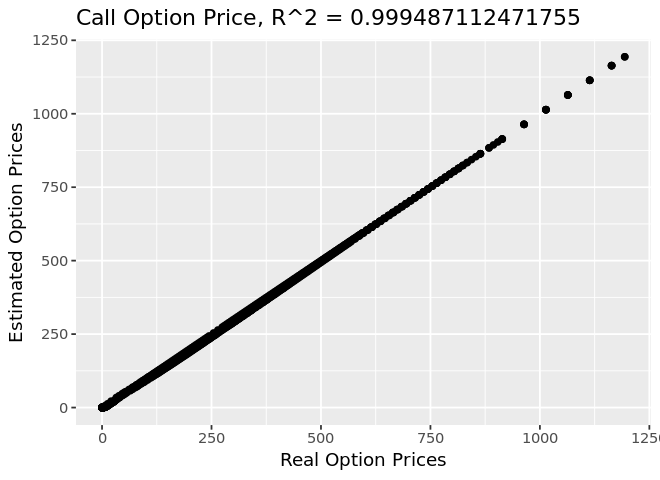

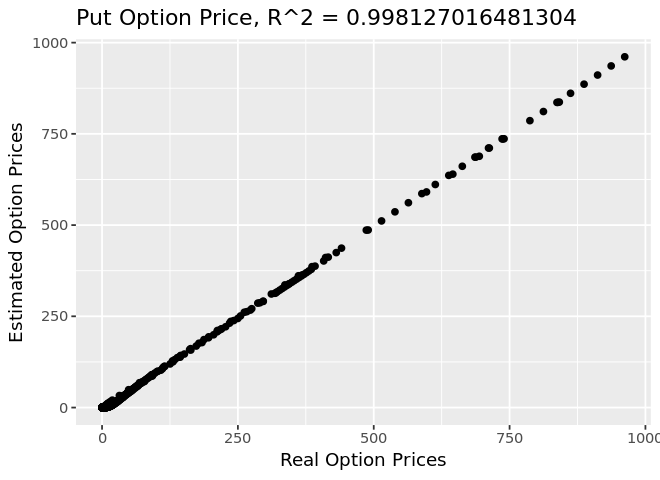

In [14]:
Call_Options <- subset(TSLA_OPTIONS, TYPE == "CALL")
Put_Options <- subset(TSLA_OPTIONS, TYPE == "PUT")

R2_Call <- R2(Call_Options$Avg_Price, Call_Options$Estimated_Price)
R2_Put <- R2(Put_Options$Avg_Price, Put_Options$Estimated_Price)

plot_call <- ggplot(Call_Options, aes(x=Avg_Price, y=Estimated_Price)) + geom_point()
plot_call + labs(x = "Real Option Prices", y = "Estimated Option Prices", title = paste(c("Call Option Price, R^2 = ", R2_Call), collapse = ''))

plot_put <- ggplot(Put_Options, aes(x=Avg_Price, y=Estimated_Price)) + geom_point()
plot_put + labs(x = "Real Option Prices", y = "Estimated Option Prices", title = paste(c("Put Option Price, R^2 = ", R2_Put), collapse = '')) 


In [ ]:
png("CALL.png", width = 650, height = 600, res = 110)
plot_call <- ggplot(Call_Options, aes(x=Avg_Price, y=Estimated_Price)) + geom_point()
plot_call + labs(x = "Real Option Prices", y = "Estimated Option Prices", title = paste(c("Call Option Price, R^2 = ", R2_Call), collapse = ''))
dev.off()

In [ ]:
png("PUT.png", width = 650, height = 600, res = 110)
plot_put <- ggplot(Put_Options, aes(x=Avg_Price, y=Estimated_Price)) + geom_point()
plot_put + labs(x = "Real Option Prices", y = "Estimated Option Prices", title = paste(c("Put Option Price, R^2 = ", R2_Put), collapse = '')) 
dev.off()